# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [2]:
vegetables = pd.read_csv('Kolkata_Cabbage.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1600,1800,1800,31-Dec-19
1,2,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1600,2000,1800,27-Dec-19
2,3,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,26-Dec-19
3,4,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,25-Dec-19
4,5,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,2000,24-Dec-19


# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [3]:
vegetables = vegetables[vegetables['District Name'] == "Kolkata"]
vegetables = vegetables[vegetables['Market Name'] == "Sealdah Koley Market"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1600,1800,1800,31-Dec-19
1,2,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1600,2000,1800,27-Dec-19
2,3,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,26-Dec-19
3,4,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,25-Dec-19
4,5,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,2000,24-Dec-19


In [4]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
9,10,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,2000,19
8,9,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,20
7,8,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,21
6,7,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,22
5,6,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,23
4,5,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,2000,24
3,4,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,25
2,3,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1800,2000,1800,26
1,2,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1600,2000,1800,27
0,1,Kolkata,Sealdah Koley Market,Cabbage,Other,FAQ,1600,1800,1800,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [5]:
climate = pd.read_csv('climate_Kolkata_Cabbage_180.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name           Market Name Commodity Variety Grade  \
0    352     353       Kolkata  Sealdah Koley Market   Cabbage   Other   FAQ   
1    351     352       Kolkata  Sealdah Koley Market   Cabbage   Other   FAQ   
2    350     351       Kolkata  Sealdah Koley Market   Cabbage   Other   FAQ   
3    349     350       Kolkata  Sealdah Koley Market   Cabbage   Other   FAQ   
4    348     349       Kolkata  Sealdah Koley Market   Cabbage   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      700                      800   
1                      600                      700   
2                      800                     1000   
3                      800                     1000   
4                      800                     1000   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                        700  ...  71.555556  68.316667  94.561111  78.906667   
1                        6

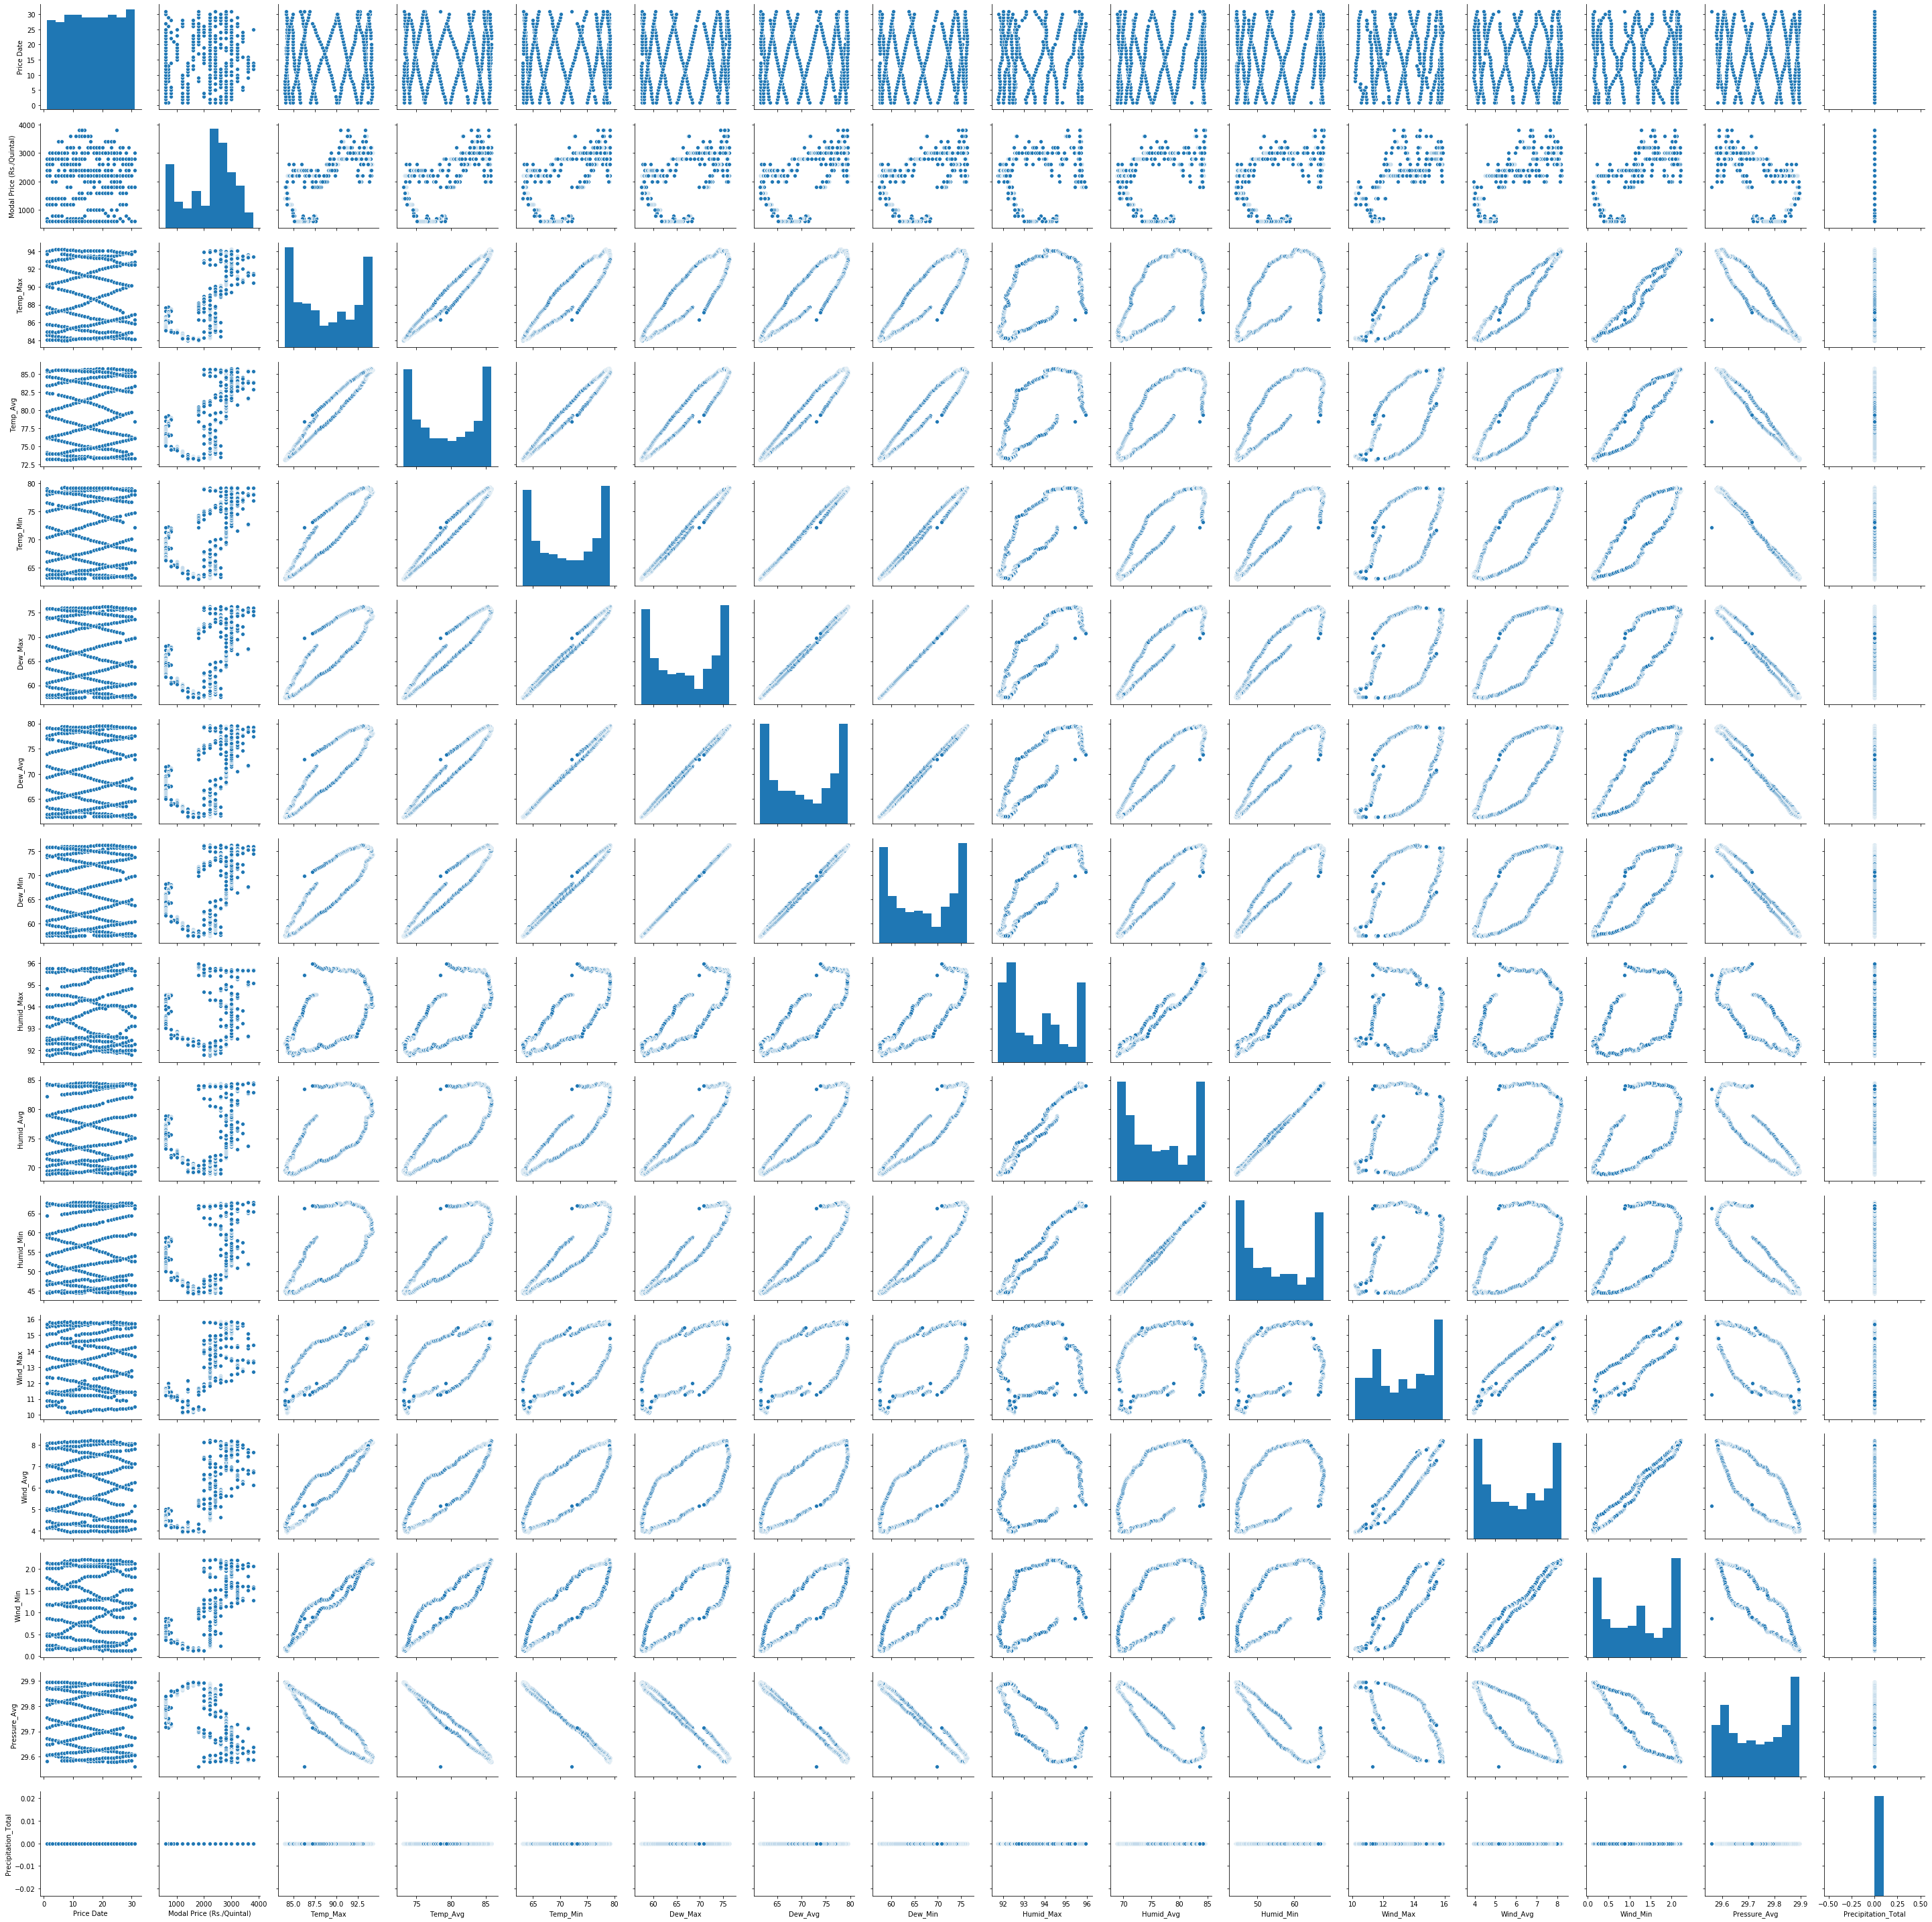

In [6]:
#sns.pairplot(data)

# Data is splitted into train and test set.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [9]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 1000,max_depth=1000, random_state=20, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 15.695254802703857


In [10]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [11]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9890555059971159
0.9603967036206312


# Feature Importance

In [12]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.032133483748847586
Temp_Max -> 0.1529776520164702
Temp_Avg -> 0.031625308900148495
Temp_Min -> 0.027430520074189658
Dew_Max -> 0.02884010276103373
Dew_Avg -> 0.03035095151194631
Dew_Min -> 0.029509981644526177
Humid_Max -> 0.025100502867142417
Humid_Avg -> 0.032899047134865696
Humid_Min -> 0.03623958408394771
Wind_Max -> 0.4625084995711586
Wind_Avg -> 0.0363612995121152
Wind_Min -> 0.033345635955030574
Pressure_Avg -> 0.04067743021857762
Precipitation_Total -> 0.0


In [13]:
'''import pickle
with open("Karad_learn_max", "rb") as f:
    rf = pickle.load(f)
rf.predict()

print(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))
print(predicted, y_test)
'''

'import pickle\nwith open("Karad_learn_max", "rb") as f:\n    rf = pickle.load(f)\nrf.predict()\n\nprint(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))\nprint(predicted, y_test)\n'

In [14]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

2931.4->3000
2224.1->2200
946.1->1000
2220.7->2200
2337.6->2200
2248.2->2200
601.3->600
1200.8->1400
2919.8->2800
1596.3->1800
1602.3->1600
2994.0->2600
3080.0->3400
2823.6->2800
2122.5->2200
624.8->600
2914.1->3000
1693.8->1600
3393.4->3400
2142.2->2200
2915.0->3000
1139.0->1200
3055.0->2800
1486.4->1400
2640.2->2000
625.4->700
2819.2->3000
684.3->700
1438.2->1400
1429.4->1400
1808.0->1800
2216.7->2200
3035.8->2800
604.9->600
2269.2->2200
2979.8->3000
1049.5->1200
2159.5->2000
641.7->600
798.6->1000
1506.2->1400
2290.3->2200
3435.8->3800
2364.4->2600
730.0->800
3120.2->3000
2091.5->2000
2080.1->2200
3001.4->2800
2347.8->2600
2623.9->2600
2298.6->2400
770.1->800
2262.6->2200
1575.2->1400
3431.0->3800
1933.0->2000
945.3->1000
3214.4->3200
1579.6->1600
3042.0->3000
2180.4->2200
602.6->600
3420.0->3200
2964.6->2600
1621.0->1600
2250.4->2200
2814.0->2800
2307.8->2200
2593.2->2600
2561.1->2600
2712.4->2800
2058.1->2000
1735.0->1800
604.3->600
1219.2->1200
2302.2->2200
657.5->700
2781.8->280

In [15]:
print(sum_a/l)

111.77547169811318
